```sklearn.datasets.make_blobs```를 사용하여 아래 코드로 데이터를 생성하세요.

```
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

```

이 데이터를 4개의 클러스터로 군집화하세요.

Python으로 구현해서 클러스터링하는데, 강의에서 만든 함수 코드를 한 군데 수정해야 한다.

(1) 클러스터의 중심점을 몇 회만에 찾는지, 매 반복 중심값만을 출력한다.

(2) 배정된 클러스터가 맞는지 비교하여 동일한지 확인하세요.

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

In [4]:
def draw(x, centroids):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')

In [5]:
def cluster(x, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, 2), dtype=float)
    clusterUpdated=True
    iter = 1
    
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf   # set arbitray max to minDist
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            for j in range(k):
                # distance from centroids[j] to x[0]
                distJI = normDist(centroids[j], x[i])
                # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
                # pick the closest centroid
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            #print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
        #print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))
        
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            # read data by index and average them
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # print ("Centroids updated: \n", _centroids)
        
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            print("\n{}회만에 클러스터의 중심점을 찾았다.\n".format(iter))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1



====== Iteration 1 ======

.....Updating Centroids
 [[ 2.33812285  3.43116792]
 [ 2.06156753  1.96918596]
 [ 2.26908736  1.32160756]
 [-0.85092246  2.26992336]] => 
[[ 0.6119605   5.41716761]
 [ 1.74807304  1.73530659]
 [ 2.06906789  0.68515871]
 [-1.37832816  4.86495168]]


====== Iteration 2 ======

.....Updating Centroids
 [[ 0.6119605   5.41716761]
 [ 1.74807304  1.73530659]
 [ 2.06906789  0.68515871]
 [-1.37832816  4.86495168]] => 
[[ 0.52546005  5.37648708]
 [ 1.71205843  1.8895176 ]
 [ 2.11445024  0.55681795]
 [-1.49306428  4.95452438]]


====== Iteration 3 ======

.....Updating Centroids
 [[ 0.52546005  5.37648708]
 [ 1.71205843  1.8895176 ]
 [ 2.11445024  0.55681795]
 [-1.49306428  4.95452438]] => 
[[ 0.50538014  5.3154575 ]
 [ 1.45205761  1.96854391]
 [ 2.12411506  0.6046173 ]
 [-1.5427762   5.055855  ]]


====== Iteration 4 ======

.....Updating Centroids
 [[ 0.50538014  5.3154575 ]
 [ 1.45205761  1.96854391]
 [ 2.12411506  0.6046173 ]
 [-1.5427762   5.055855  ]] => 
[[ 0.

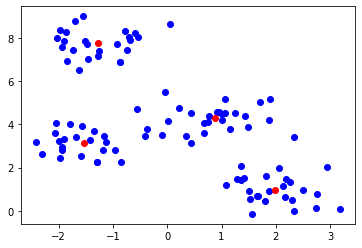

In [7]:
k = 4
idx_list = np.random.randint(0, len(X), size=4)
centroids = np.array([X[idx_list[0]], X[idx_list[1]], X[idx_list[2]], X[idx_list[3]]], dtype = float)
centroids, clusterAssigned = cluster(X, k, centroids)
draw(X, centroids)

In [8]:
def same_cluster_idx_set(k, c_list):
    res = list()
    for i in range(k):
        m_res = list()
        for j in range(len(c_list)):
            if c_list[j] == i:
                m_res.append(j)
        res.append(m_res)
    return res

In [9]:
a, b = same_cluster_idx_set(4, y), same_cluster_idx_set(4, clusterAssigned[:,0])

In [10]:
a.sort(key=lambda x:x[0])
b.sort(key=lambda x:x[0])

In [11]:
w_dict = dict()
for i in range(k):
    for j in range(len(b[i])):
        if b[i][j] not in a[i]:
            w_dict[b[i][j]] = i

In [13]:
for key in w_dict:
    for i in range(k):
        if key in a[i]:
            print("{}번째 데이터는 실제로 그룹 {} 지만, 그룹 {} 으로 예측되었다.".format(key, i, w_dict[key]))

17번째 데이터는 실제로 그룹 2 지만, 그룹 0 으로 예측되었다.
